<a href="https://colab.research.google.com/github/makhmudjumanazarov/deep_learning/blob/main/02_MNIST_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U tensorflow==1.13.1
import tensorflow as tf
tf.__version__  

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("/content/drive/MyDrive/tensorflow/MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.


Extracting /content/drive/MyDrive/tensorflow/MNIST_data/train-images-idx3-ubyte.gz


Instructions for updating:
Please use tf.data to implement this functionality.


Extracting /content/drive/MyDrive/tensorflow/MNIST_data/train-labels-idx1-ubyte.gz


Instructions for updating:
Please use tf.one_hot on tensors.


Extracting /content/drive/MyDrive/tensorflow/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /content/drive/MyDrive/tensorflow/MNIST_data/t10k-labels-idx1-ubyte.gz


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
mnist 

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f1eb9b7d850>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f1ebe989090>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f1e9ad6ff90>)

In [6]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [7]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
mnist.train.num_examples

55000

In [9]:
mnist.test.num_examples

10000

In [10]:
mnist.validation.num_examples

5000

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
mnist.train.images[1].shape

(784,)

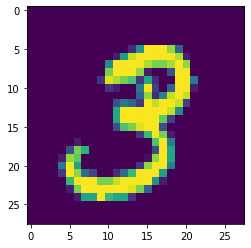

In [13]:
plt.imshow(mnist.train.images[1].reshape(28,28))

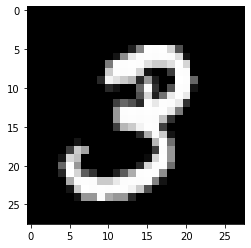

In [14]:
plt.imshow(mnist.train.images[1].reshape(28,28),cmap='gist_gray')

In [15]:
mnist.train.images[1].max()

1.0

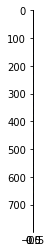

In [16]:
plt.imshow(mnist.train.images[1].reshape(784,1))

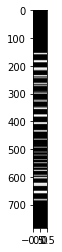

In [17]:
plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray',aspect=0.02)

In [18]:
x = tf.placeholder(tf.float32,shape=[None,784])

In [19]:
# 10 because 0-9 possible numbers
W = tf.Variable(tf.zeros([784,10]))

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
b = tf.Variable(tf.zeros([10]))

In [21]:
# Create the Graph
y = tf.matmul(x,W) + b 

In [22]:
y 

<tf.Tensor 'add:0' shape=(?, 10) dtype=float32>

In [23]:
y_true = tf.placeholder(tf.float32,[None,10])

In [24]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y))

In [25]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [26]:
train = optimizer.minimize(cross_entropy)

In [27]:
init = tf.global_variables_initializer()

In [28]:
with tf.Session() as sess:
    sess.run(init)
    
    # Train the model for 1000 steps on the training set
    # Using built in batch feeder from mnist for convenience
    
    for step in range(1000):
        
        batch_x , batch_y = mnist.train.next_batch(100)
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
        
    # Test the Train Model
    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    
    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.9133
